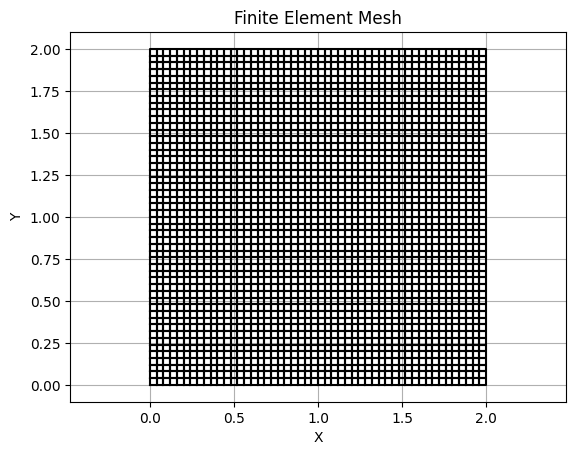

[[0.   0.  ]
 [0.   0.04]
 [0.   0.08]
 ...
 [2.   1.92]
 [2.   1.96]
 [2.   2.  ]]
[[   0   51   52    1]
 [   1   52   53    2]
 [   2   53   54    3]
 ...
 [2546 2597 2598 2547]
 [2547 2598 2599 2548]
 [2548 2599 2600 2549]]


In [51]:
# THIS THE MAIN FE CODE #

import numpy as np
import math
from QuadrilateralMesh import QuadrilateralMesh  
from PlotMesh import PlotMesh
from solution import solution


tol = 1e-5 # tolerance for zero

## GEOMETRICAL PROPERTIES ##

Lx = 2
Ly = 2
h = 0.01 # Plate thickness

nx = 5 # number of division in x-direction
ny = 5 # number of division in y-direction

dx = Lx/nx # mesh size in x-direction
dy = Ly/ny # mesh size in y-direction


xy,elNode,nE,nP = QuadrilateralMesh(Lx,Ly,nx,ny) # discretizing the boundary

nDof = 2*nP # total number of degrees of freedom

PlotMesh(xy,elNode) # Plotting the mesh

print(xy)
print(elNode)








In [52]:
# ## MATERIAL PROPERTIES ##
E = 2e11  # elastic modulus
pois = 0.270 # Poisson's ratio
dens = 7850 # mass density


In [53]:
# BOUNDARY CONDITIONS #
left_boundary = np.where(xy[:, 0] == 0)     # left boundary
fixed_dofs = np.vstack([left_boundary[0], left_boundary[0]+nP]) # fixed degrees of freedom
print(fixed_dofs)
print(left_boundary)

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45   46   47   48   49   50]
 [2601 2602 2603 2604 2605 2606 2607 2608 2609 2610 2611 2612 2613 2614
  2615 2616 2617 2618 2619 2620 2621 2622 2623 2624 2625 2626 2627 2628
  2629 2630 2631 2632 2633 2634 2635 2636 2637 2638 2639 2640 2641 2642
  2643 2644 2645 2646 2647 2648 2649 2650 2651]]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),)


In [54]:
# FORCE VECTOR #
# generate a code that applies distributed force on right boundary and transform the distributed force into nodal force
fx = 5e8 # distributed force in x-direction
fy = 0 # distributed force in y-direction

force = np.zeros(2*nP) # initialize force vector

right_boundary = np.where(xy[:, 0] >= Lx-tol)     # right boundary


# convert distributed force into nodal force
force[right_boundary] = fx*dy
force[right_boundary[0][0]] = fx*dy/2
force[right_boundary[0][-1]] = fx*dy/2

print(force)



[0. 0. 0. ... 0. 0. 0.]


In [55]:
# CONSTITUTIVE MATRIX #
C = np.array([[1, pois, 0],
              [pois, 1, 0],
              [0, 0, (1-pois)/2]])
C *= E / (1 - pois**2)


In [56]:
# STIFFNESS MATRIX #
from StiffnessQuad import StiffnessMatrix 
xy = np.round(xy, 4)

stiff,mass, strainDispMat = StiffnessMatrix(nDof,nE,elNode,nP,xy,C,dens,h) # compute stiffness matrix

print(np.linalg.det(stiff))
print(np.linalg.det(mass))


-inf
0.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [57]:
disp = solution(nDof,fixed_dofs,stiff,force)
print(disp)



[ 0.          0.          0.         ... -0.06449435 -0.06719233
 -0.06989172]


In [58]:
print(xy)
print()
element = [1,6,7,2]
print(xy[element])

[[0.   0.  ]
 [0.   0.04]
 [0.   0.08]
 ...
 [2.   1.92]
 [2.   1.96]
 [2.   2.  ]]

[[0.   0.04]
 [0.   0.24]
 [0.   0.28]
 [0.   0.08]]


In [59]:
print(disp[element])
element_v = [x + nE for x in element]
print(disp[element_v])

displacements = np.vstack([disp[element].reshape(-1,1), disp[element_v].reshape(-1,1)])
disp_reshape = displacements.reshape(-1,1)
print()
print(disp_reshape)
print()
print(displacements)

[0. 0. 0. 0.]
[0.48689855 0.48597398 0.48576514 0.48673139]

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.48689855]
 [0.48597398]
 [0.48576514]
 [0.48673139]]

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.48689855]
 [0.48597398]
 [0.48576514]
 [0.48673139]]


In [60]:
from solve_for_stress import solve_for_stress
stresses = solve_for_stress(disp, elNode,xy,C,strainDispMat)

uDisp= [0.         0.01689382 0.01191082 0.        ]
vDisp= [0.48705938 0.49705914 0.49689794 0.48689855]
element_displacements= [0.         0.48705938 0.01689382 0.49705914 0.01191082 0.49689794
 0.         0.48689855]
stress= [-1.09466929e+12  1.05245991e+12  2.19400997e+10]
uDisp= [0.         0.01191082 0.01068912 0.        ]
vDisp= [0.48689855 0.49689794 0.49673111 0.48673139]
element_displacements= [0.         0.48689855 0.01191082 0.49689794 0.01068912 0.49673111
 0.         0.48673139]
stress= [-1.11409948e+12  1.05154846e+12  2.03821809e+10]
uDisp= [0.         0.01068912 0.01004255 0.        ]
vDisp= [0.48673139 0.49673111 0.49655635 0.48655564]
element_displacements= [0.         0.48673139 0.01068912 0.49673111 0.01004255 0.49655635
 0.         0.48655564]
stress= [-1.11818235e+12  1.05248738e+12  2.01536132e+10]
uDisp= [0.         0.01004255 0.00967516 0.        ]
vDisp= [0.48655564 0.49655635 0.49637279 0.48637052]
element_displacements= [0.         0.48655564 0.01004255 0.4

In [61]:
print(stresses)

[[-1.09466929e+12  1.05245991e+12  2.19400997e+10]
 [-1.11409948e+12  1.05154846e+12  2.03821809e+10]
 [-1.11818235e+12  1.05248738e+12  2.01536132e+10]
 ...
 [ 1.28120672e+12 -1.29150854e+12  2.96142189e+09]
 [ 1.28773215e+12 -1.29800710e+12  2.95230706e+09]
 [ 1.41326952e+12 -8.63654150e+11 -1.57961999e+11]]


In [62]:
print(stiff)
print()
print((strainDispMat))

[[ 9.81555388e+08  9.70769065e+07  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.70769065e+07  1.96311078e+09  9.70769065e+07 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.70769065e+07  1.96311078e+09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.96311078e+09
  -5.87854600e+08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.87854600e+08
   1.96311078e+09 -5.87854600e+08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -5.87854600e+08  9.81555388e+08]]

[[ -5.28312164   5.28312164  19.71687836 -19.71687836   0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.         -19.71687836
   -5.28312164   5.28312164  19.71687836]
 [-19.71687836  -5.28312164   5.28312164  19.71687836  -5.28312164
    5.28312164  19.71687836 -19.71687836]]


In [63]:
print(disp)

[ 0.          0.          0.         ... -0.06449435 -0.06719233
 -0.06989172]


In [64]:
print(np.shape(disp))

(5202,)


In [65]:
udof = np.arange(0, nP, 1)
vdof = udof + nP

ux = disp[udof]
uy = disp[vdof]

In [66]:
print(elNode)

[[   0   51   52    1]
 [   1   52   53    2]
 [   2   53   54    3]
 ...
 [2546 2597 2598 2547]
 [2547 2598 2599 2548]
 [2548 2599 2600 2549]]


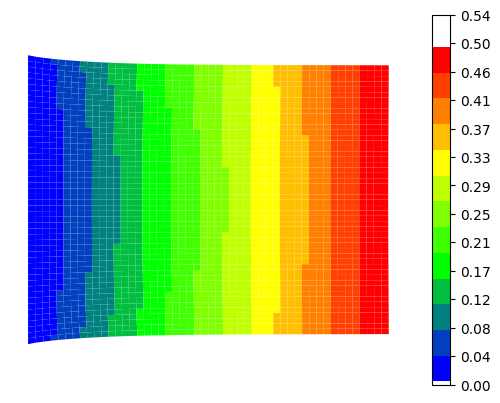

In [67]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt

# Assuming xy, ux, uy, and elNode are already defined
scale = 1
xy_NewFEM = xy + scale * np.column_stack((ux, uy))
min_u_FEM = np.min(ux)
max_u_FEM = np.max(ux)
# Assuming the first column is unnecessary
elNode_corrected = elNode[:, 1:]

from PlotFieldonMesh import PlotFieldonMesh
PlotFieldonMesh(xy_NewFEM,elNode,ux,min_u_FEM,max_u_FEM)

In [68]:
von_misses_stresses = np.sqrt(stresses[:, 0]**2 - stresses[:, 0] * stresses[:, 1] + stresses[:, 1]**2 + 3 * stresses[:, 2]**2)


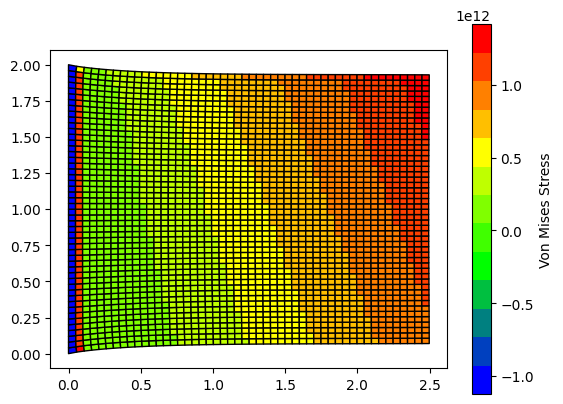

In [69]:
from matplotlib.collections import PolyCollection
from matplotlib.colors import ListedColormap

cmap = np.array([[0, 0, 1],
                     [0, 0.25, 0.75],
                     [0, 0.5, 0.5],
                     [0, 0.75, 0.25],
                     [0, 1, 0],
                     [0.25, 1, 0],
                     [0.5, 1, 0],
                     [0.75, 1, 0],
                     [1, 1, 0],
                     [1, 0.75, 0],
                     [1, 0.5, 0],
                     [1, 0.25, 0],
                     [1, 0, 0]])

custom_cmap = ListedColormap(cmap)

# Prepare the vertices of the elements
vertices = []
for iel in range(nE):
        vertices.append([xy_NewFEM[n] for n in elNode[iel]])
        
coll = PolyCollection(vertices, array=stresses[:,0], cmap=custom_cmap, edgecolors='black')

# Create the plot
fig, ax = plt.subplots()
ax.add_collection(coll)
ax.autoscale_view()


# Add a color bar
plt.colorbar(coll, ax=ax, label='Von Mises Stress')



# min_stress = np.min(stresses[:,0])
# max_stress = np.max(stresses[:,0])

# cbar = plt.colorbar(coll, ax=ax, label='Von Mises Stress')
# ncolor = len(cmap)
# varistep = (min_stress - max_stress) / (ncolor - 1)
# cbar.set_ticks(np.arange(min_stress, max_stress + varistep, varistep))
# cbar.set_ticklabels([f'{i:.2f}' for i in np.arange(min_stress, max_stress + varistep, varistep)])

ax.set_aspect('equal')
# Show the plot
plt.show()

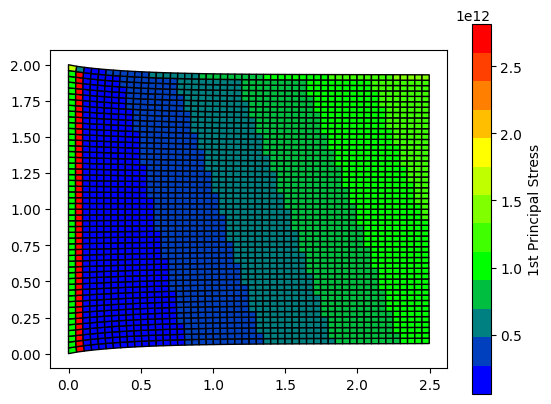

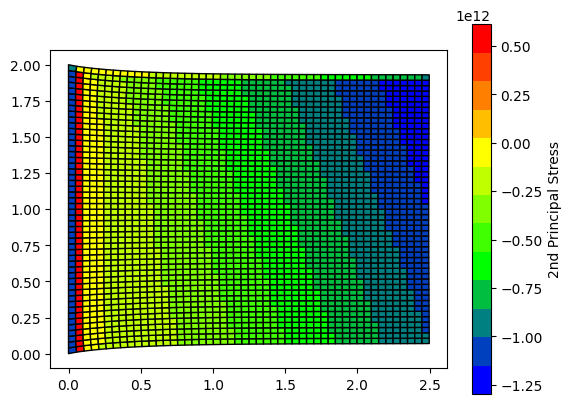

In [70]:
sigma_1 = 1/2*(stresses[:,0] + stresses[:,1]) + np.sqrt(1/4*(stresses[:,0] - stresses[:,1])**2 + stresses[:,2]**2) # principal stress 1
sigma_2 = 1/2*(stresses[:,0] + stresses[:,1]) - np.sqrt(1/4*(stresses[:,0] - stresses[:,1])**2 + stresses[:,2]**2) # principal stress 2
first_principal_stress = np.max(np.array([sigma_1,sigma_2]), axis=0) # maximum principal stress
second_principal_stress = np.min(np.array([sigma_1,sigma_2]), axis=0) # minimum principal stress

# Prepare the vertices of the elements
vertices = []
for iel in range(nE):
        vertices.append([xy_NewFEM[n] for n in elNode[iel]])

coll1 = PolyCollection(vertices, array=first_principal_stress, cmap=custom_cmap, edgecolors='black')
coll2 = PolyCollection(vertices, array=second_principal_stress, cmap=custom_cmap, edgecolors='black')

# Create the plot
fig, ax = plt.subplots()
ax.add_collection(coll1)
ax.autoscale_view()


# Add a color bar
plt.colorbar(coll1, ax=ax, label='1st Principal Stress')

ax.set_aspect('equal')

plt.show()

fig, ax = plt.subplots()
ax.add_collection(coll2)
ax.autoscale_view()


# Add a color bar
plt.colorbar(coll2, ax=ax, label='2nd Principal Stress')

ax.set_aspect('equal')

plt.show()
